In [39]:
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [40]:
# 1. Transform images to tensors and resize them to a fixed size
transform = transforms.Compose([
    transforms.Resize((224, 224)),   # Resize all images to the same size
    transforms.ToTensor(),           # Convert images to tensors
])

# 2. Load the dataset using ImageFolder (subfolder = label)
dataset = datasets.ImageFolder(root='Incidents-subset', transform=transform)

# 3. Split the dataset into train/test sets
from torch.utils.data import random_split

train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size

train_dataset, test_dataset = random_split(dataset, [train_size, test_size])



# Visualize Dataset

Total images: 7308
Training dataset size: 5846
Test dataset size: 1462

Number of classes in the dataset: 12
Classes in the dataset:  ['airplane accident', 'bicycle accident', 'car accident', 'collapsed', 'earthquake', 'flooded', 'ice storm', 'nuclear explosion', 'oil spill', 'tornado', 'volcanic eruption', 'wildfire']
Index of each class:  {'airplane accident': 0, 'bicycle accident': 1, 'car accident': 2, 'collapsed': 3, 'earthquake': 4, 'flooded': 5, 'ice storm': 6, 'nuclear explosion': 7, 'oil spill': 8, 'tornado': 9, 'volcanic eruption': 10, 'wildfire': 11}

Number of images for each label:
Label 0: 874 images
Label 1: 228 images
Label 2: 966 images
Label 3: 631 images
Label 4: 925 images
Label 5: 958 images
Label 6: 615 images
Label 7: 231 images
Label 8: 294 images
Label 9: 281 images
Label 10: 628 images
Label 11: 677 images

First image in the dataset:
Image shape: torch.Size([3, 224, 224])
Label: 0
Label name: airplane accident


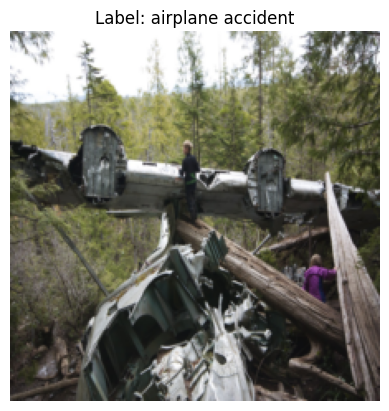

In [51]:
# print the number of images in the training and test sets
print(f"Total images: {len(dataset)}")
print(f"Training dataset size: {len(train_dataset)}")
print(f"Test dataset size: {len(test_dataset)}\n")

# print the classes in the dataset
print(f"Number of classes in the dataset: {len(dataset.classes)}")
print(f"Classes in the dataset:  {dataset.classes}")
print(f"Index of each class:  {dataset.class_to_idx}\n")

# Show how many images for each label
from collections import Counter

# Count the number of images for each label in dataset
counter = Counter(dataset.targets)
print("Number of images for each label:")
for label, count in counter.items():
    print(f"Label {label}: {count} images")


# Print the shape of an first image in the dataset add also the label
print("\nFirst image in the dataset:")
image, label = dataset[0]
print(f"Image shape: {image.shape}")
print(f"Label: {label}")
print(f"Label name: {dataset.classes[label]}")

# Display the image
plt.imshow(image.permute(1, 2, 0))
plt.title(f"Label: {dataset.classes[label]}")
plt.axis('off')
plt.show()


